In [31]:
%load_ext rich
import base64
import io
import os
import re

import PIL.Image
import openai
import pdfplumber


def encode_image(image: PIL.Image):
    in_mem_file = io.BytesIO()
    image.save(in_mem_file, format = "PNG")
    # reset file pointer to start
    in_mem_file.seek(0)
    img_bytes = in_mem_file.read()

    base64_encoded_result_bytes = base64.b64encode(img_bytes)
    return base64_encoded_result_bytes.decode('ascii')


In [2]:
client = openai.OpenAI()  # Default to os.environ.get("OPENAI_API_KEY")


def query(msg, images=[]):
    response = client.chat.completions.create(
        model="gpt-4o",
        temperature=0,
        seed=213,
        messages=[{"role": "user", "content": [
            {"type": "text", "text": msg}] + [
            {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encode_image(img)}"}} for img in images]}])

    return response.choices[0].message.content

In [3]:
print(query("Hello test test"))

Hello! How can I assist you today?

In [4]:
fname = "../../data/example_docketsheets_courtsummaries/DS_MJ-26304-CR-0000183-2006.pdf"

pages = pdfplumber.open(fname).pages

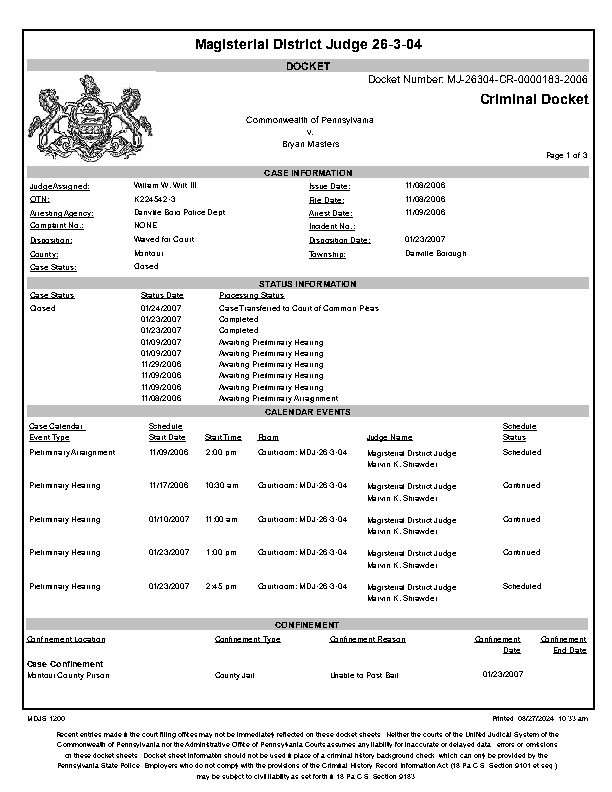

In [5]:
pages[0].to_image()

In [6]:
print(pages[0].extract_text(layout=True))

Magisterial District Judge 26-3-04                       
                                                                                    
                                       DOCKET                                       
                                                   Docket Number: MJ-26304-CR-0000183-2006
                                                                  Criminal Docket   
                                                                                    
                                  Commonwealth of Pennsylvania                      
                                          v.                                        
                                       Bryan Masters                                
                                                                           Page 1 of 3
                                    CASE INFORMATION                                
    Judge Assigned: William W. Wilt III    Issue Date:  11/08/2006                  
    OTN:          K 224542-3               File Date:   11/08/2006                  
    Arresting Agency: Danville Boro Police Dept Arrest Date: 11/09/2006             
    Complaint No.: NONE                    Incident No.:                            
    Disposition:  Waived for Court         Disposition Date: 01/23/2007             
    County:       Montour                  Township:    Danville Borough            
    Case Status:  Closed                                                            
                                                                                    
                                    STATUS INFORMATION                              
    Case Status    Status Date Processing Status                                    
    Closed         01/24/2007 Case Transferred to Court of Common Pleas             
                   01/23/2007 Completed                                             
                   01/23/2007 Completed                                             
                   01/09/2007 Awaiting Preliminary Hearing                          
                   01/09/2007 Awaiting Preliminary Hearing                          
                   11/29/2006 Awaiting Preliminary Hearing                          
                   11/09/2006 Awaiting Preliminary Hearing                          
                   11/09/2006 Awaiting Preliminary Hearing                          
                   11/08/2006 Awaiting Preliminary Arraignment                      
                                     CALENDAR EVENTS                                
    Case Calendar    Schedule                                        Schedule       
    Event Type       Start Date Start Time Room    Judge Name        Status         
    Preliminary Arraignment 11/09/2006 2:00 pm Courtroom: MDJ-26-3-04 Magisterial District Judge Scheduled
                                                   Marvin K. Shrawder               
    Preliminary Hearing 11/17/2006 10:30 am Courtroom: MDJ-26-3-04 Magisterial District Judge Continued
                                                   Marvin K. Shrawder               
    Preliminary Hearing 01/10/2007 11:00 am Courtroom: MDJ-26-3-04 Magisterial District Judge Continued
                                                   Marvin K. Shrawder               
    Preliminary Hearing 01/23/2007 1:00 pm Courtroom: MDJ-26-3-04 Magisterial District Judge Continued
                                                   Marvin K. Shrawder               
                                                                                    
    Preliminary Hearing 01/23/2007 2:45 pm Courtroom: MDJ-26-3-04 Magisterial District Judge Scheduled
                                                   Marvin K. Shrawder               
                                                                                    
                                      CONFINEMENT                                   
    Confineme

In [7]:
alltext = "\n".join([page.extract_text(keep_blank_chars=True, layout=True) for page in pages])

In [8]:
print(alltext)

Magisterial District Judge 26-3-04                       
                                                                                    
                                       DOCKET                                       
                                                   Docket Number: MJ-26304-CR-0000183-2006
                                                                  Criminal Docket   
                                                                                    
                                  Commonwealth of Pennsylvania                      
                                          v.                                        
                                       Bryan Masters                                
                                                                           Page 1 of 3
                                    CASE INFORMATION                                
    Judge Assigned: William W. Wilt III    Issue Date:  11/08/2006                  
    OTN:          K 224542-3               File Date:   11/08/2006                  
    Arresting Agency: Danville Boro Police Dept Arrest Date: 11/09/2006             
    Complaint No.: NONE                    Incident No.:                            
    Disposition:  Waived for Court         Disposition Date: 01/23/2007             
    County:       Montour                  Township:    Danville Borough            
    Case Status:  Closed                                                            
                                                                                    
                                    STATUS INFORMATION                              
    Case Status    Status Date Processing Status                                    
    Closed         01/24/2007 Case Transferred to Court of Common Pleas             
                   01/23/2007 Completed                                             
                   01/23/2007 Completed                                             
                   01/09/2007 Awaiting Preliminary Hearing                          
                   01/09/2007 Awaiting Preliminary Hearing                          
                   11/29/2006 Awaiting Preliminary Hearing                          
                   11/09/2006 Awaiting Preliminary Hearing                          
                   11/09/2006 Awaiting Preliminary Hearing                          
                   11/08/2006 Awaiting Preliminary Arraignment                      
                                     CALENDAR EVENTS                                
    Case Calendar    Schedule                                        Schedule       
    Event Type       Start Date Start Time Room    Judge Name        Status         
    Preliminary Arraignment 11/09/2006  2:00 pm Courtroom: MDJ-26-3-04 Magisterial District Judge  Scheduled
                                                   Marvin K. Shrawder               
    Preliminary Hearing 11/17/2006 10:30 am Courtroom: MDJ-26-3-04 Magisterial District Judge  Continued
                                                   Marvin K. Shrawder               
    Preliminary Hearing 01/10/2007 11:00 am Courtroom: MDJ-26-3-04 Magisterial District Judge  Continued
                                                   Marvin K. Shrawder               
    Preliminary Hearing 01/23/2007  1:00 pm Courtroom: MDJ-26-3-04 Magisterial District Judge  Continued
                                                   Marvin K. Shrawder               
                                                                                    
    Preliminary Hearing 01/23/2007  2:45 pm Courtroom: MDJ-26-3-04 Magisterial District Judge  Scheduled
                                                   Marvin K. Shrawder               
                                                                                    
                                      CONFINEMENT                                   
    C

In [51]:
answer = query("""Below you find the text extracted from a court document. 
               Please create Python code to extract each section from the text.
               A section starts with a line with centered all-caps text and ends with the next section. It may also have characters like / or -, but 
               not lower-case text, but it must have uppercase text with at least 4 uppercase letters.
               The Python function should return a dictionary with the section header as key and the text as value.
               This should apply to all documents of this type, where the section headers are not known in advance, so
               do not hardcode any section headers but create universal logic. What is known is that they
               will have centered all-caps text. 

               An example return would be:

               result = {"ATTORNEY INFORMATION": "   Court Appointed                      District Attorney                          
                                                                                    
    Name:  Leslie Weiss Bryden, Esq.     Name:  Robert Buehner, Esq.                
    Representing:  Masters, Bryan        Representing:  Commonwealth of Pennsylvania
    Counsel Status:  Active              Counsel Status:  Active                    
    Supreme Court No.:  058858           Supreme Court No.:                         
    Phone No.:  570-389-0285             Phone No.:                                 
    Address: Columbia CO Pd's Office     Address: Montour Co Courthouse             
           156 W Main St                         Danville, PA  17821      ",
           "BAIL": "Bail Set:                                                        Nebbia Status: None
    Bail Action Type Bail Action Date Bail Type Originating Court Percentage Amount 
    Set             11/09/2006  Monetary      Magisterial District Court $100,000.00
    "}
           
               Return only the function, no explanations or examples are needed.
               Here is the text:
               
                """ + f"{alltext}")

answer = "\n".join([line for line in answer.split("\n") if "```" not in line])
print(answer)

import re

def extract_sections(text):
    # Regular expression to find section headers
    section_header_pattern = re.compile(r'^\s*[A-Z\s\/\-]{4,}\s*$', re.MULTILINE)
    
    # Find all section headers
    headers = [(match.start(), match.group().strip()) for match in section_header_pattern.finditer(text)]
    
    # Dictionary to store sections
    sections = {}
    
    # Iterate over headers and extract sections
    for i in range(len(headers)):
        start_index = headers[0]
        header = headers[1]
        end_index = headers[0] if i + 1 < len(headers) else len(text)
        
        # Extract section text
        section_text = text.strip()
        
        # Remove the header from the section text
        section_text = section_text.strip()
        
        # Add to dictionary
        sections = section_text
    
    return sections

In [56]:
def extract_sections(text):
    # Regular expression to find section headers
    section_header_pattern = re.compile(r'^\s*[A-Z\s\/\-]{4,}\s*$', re.MULTILINE)
    
    # Find all section headers
    headers = [(match.start(), match.group().strip()) for match in section_header_pattern.finditer(text)]
    
    # Dictionary to store sections
    sections = {}
    
    # Iterate over headers and extract sections
    for i in range(len(headers)):
        start_index = headers[i][0]
        header = headers[i][1]
        end_index = headers[i + 1][0] if i + 1 < len(headers) else len(text)
        
        # Extract section text
        section_text = text[start_index:end_index].strip()
        
        # Remove the header from the section text
        section_text = section_text[len(header):].strip()
        
        # Add to dictionary
        sections[header] = section_text
    
    return sections

In [57]:
extract_sections(alltext)


{
    '': 'MDJS 1200                           Page 3 of 3                 Printed: 08/27/2024  10:33 am\n        Recent entries made in the court filing offices may not be immediately reflected on these docket sheets. Neither the courts of the Unified Judicial System of the \n        Commonwealth of Pennsylvania nor the Administrative Office of Pennsylvania Courts assumes any liability for inaccurate or delayed data, errors or omissions \n         on these docket sheets.  Docket sheet information should not be used in place of a criminal history background check, which can only be provided by the \n        Pennsylvania State Police. Employers who do not comply with the provisions of the Criminal History Record Information Act (18 Pa.C.S. Section 9101 et seq.) \n                           may be subject to civil liability as set forth in 18 Pa.C.S. Section 9183.',
    'DOCKET': 'Docket Number: MJ-26304-CR-0000183-2006\n                                                                  Criminal Docket',
    'CASE INFORMATION': 'Judge Assigned: William W. Wilt III    Issue Date:  11/08/2006                  \n    OTN:          K 224542-3               File Date:   11/08/2006                  \n    Arresting Agency: Danville Boro Police Dept Arrest Date: 11/09/2006             \n    Complaint No.: NONE                    Incident No.:                            \n    Disposition:  Waived for Court         Disposition Date: 01/23/2007             \n    County:       Montour                  Township:    Danville Borough            \n    Case Status:  Closed',
    'STATUS INFORMATION': 'Case Status    Status Date Processing Status                                    \n    Closed         01/24/2007 Case Transferred to Court of Common Pleas             \n                   01/23/2007 Completed                                             \n                   01/23/2007 Completed                                             \n                   01/09/2007 Awaiting Preliminary Hearing                          \n                   01/09/2007 Awaiting Preliminary Hearing                          \n                   11/29/2006 Awaiting Preliminary Hearing                          \n                   11/09/2006 Awaiting Preliminary Hearing                          \n                   11/09/2006 Awaiting Preliminary Hearing                          \n                   11/08/2006 Awaiting Preliminary Arraignment',
    'CALENDAR EVENTS': 'Case Calendar    Schedule                                        Schedule       \n    Event Type       Start Date Start Time Room    Judge Name        Status         \n    Preliminary Arraignment 11/09/2006  2:00 pm Courtroom: MDJ-26-3-04 Magisterial District Judge  Scheduled\n                                                   Marvin K. Shrawder               \n    Preliminary Hearing 11/17/2006 10:30 am Courtroom: MDJ-26-3-04 Magisterial District Judge  Continued\n                                                   Marvin K. Shrawder               \n    Preliminary Hearing 01/10/2007 11:00 am Courtroom: MDJ-26-3-04 Magisterial District Judge  Continued\n                                                   Marvin K. Shrawder               \n    Preliminary Hearing 01/23/2007  1:00 pm Courtroom: MDJ-26-3-04 Magisterial District Judge  Continued\n                                                   Marvin K. Shrawder',
    'CONFINEMENT': 'Confinement Location      Confinement Type Confinement Reason Confinement  Confinement \n                                                                     Date   End Date\n    Case Confinement                                                                \n    Montour County Prison     County Jail    Unable to Post Bail   01/23/2007',
    'DEFENDANT INFORMATION': 'Name:         Masters, Bryan           Sex:         Male                        \n    Date of Birth: 01/24/1964              Race:        White                       \n    Address(es):                                

In [30]:
print(headers)

<callable_iterator object at 0x7e1d447344f0>